# Demography indicators 
tp = 'SP.POP.TOTL'  
up = 'SP.URB.TOTL.IN.ZS'  
rp = 'SP.RUR.TOTL.ZS'  
le = 'SP.DYN.LE00.IN'    
im = 'SP.DYN.IMRT.IN'    
pd = 'EN.POP.DNST'  
ph = 'SI.POV.NAHC'   
pg = 'SP.POP.GROW'  
fr = 'SP.DYN.TFRT.IN'  
gdp = 'NY.GDP.PCAP.PP.KD'  

In [53]:
import requests
import pandas as pd

def download_worldbank(indicator, countries, date_start, date_end):
    url_base = 'http://api.worldbank.org/v2/'  # Base URL for the World Bank API
    country_codes = ';'.join(countries)  # Combine country codes into a string
    url = url_base + f'country/{country_codes}/indicator/{indicator}?per_page=30000&format=xml'

    response = requests.get(url)
    df = pd.read_xml(response.content)
    return df

In [54]:
# INDICATORS
indicators = [
    'SP.POP.TOTL',  # Total population
    'SP.URB.TOTL.IN.ZS',  # Urban population (% of total population)
    'SP.RUR.TOTL.ZS',  # Rural population (% of total population)
    'SP.DYN.LE00.IN',  # Life expectancy at birth (total years)
    'SP.DYN.IMRT.IN',  # Infant mortality rate (per 1,000 live births)
    'EN.POP.DNST',  # Population density (people per sq. km of land area)
    'SI.POV.NAHC',  # Poverty headcount ratio at national poverty lines (% of population)
    'SP.POP.GROW',  # Population growth rate (% annual)
    'SP.DYN.TFRT.IN',  # Total fertility rate (births per woman)
    'NY.GDP.PCAP.PP.KD',  # GDP per capita (constant 2011 PPP $)
]

# ASEAN VARIABLES
asean_variables = {}
sa_variables = {}

for i, x in enumerate(indicators):
    asean_variables[x] = download_worldbank(
        indicator=x,
        countries=asean_list,
        date_start='2011',
        date_end='2024',
    )

for i, x in enumerate(indicators):
    sa_variables[x] = download_worldbank(
        indicator=x,
        countries=south_asia_list,
        date_start='2011',
        date_end='2024',
    )

# Now you can access the results like this:
for indicator, df in asean_variables.items():
    print(f"Indicator: {indicator}")
    print(df.head(2))
    print()

for indicator, df in sa_variables.items():
    print(f"Indicator: {indicator}")
    print(df.head(2))
    print()

Indicator: SP.POP.TOTL
           indicator            country countryiso3code  date     value  unit  \
0  Population, total  Brunei Darussalam             BRN  2024       NaN   NaN   
1  Population, total  Brunei Darussalam             BRN  2023  458949.0   NaN   

   obs_status  decimal  
0         NaN        0  
1         NaN        0  

Indicator: SP.URB.TOTL.IN.ZS
                                  indicator            country  \
0  Urban population (% of total population)  Brunei Darussalam   
1  Urban population (% of total population)  Brunei Darussalam   

  countryiso3code  date   value  unit  obs_status  decimal  
0             BRN  2024     NaN   NaN         NaN        0  
1             BRN  2023  79.149   NaN         NaN        0  

Indicator: SP.RUR.TOTL.ZS
                                  indicator            country  \
0  Rural population (% of total population)  Brunei Darussalam   
1  Rural population (% of total population)  Brunei Darussalam   

  countryiso3code  d

In [56]:
# Save the ASEAN dataset as CSV
for indicator, df in asean_variables.items():
    df.to_csv(f'../data/raw/asean_{indicator}.csv', index=False)

# Save the South Asia dataset as CSV
for indicator, df in sa_variables.items():
    df.to_csv(f'../data/raw/south_asia_{indicator}.csv', index=False)

In [ ]:
import pandas as pd

# Read all the CSV files
asean_dfs = []
for indicator, df in asean_variables.items():
    df['Region'] = 'ASEAN'
    asean_dfs.append(df)

sa_dfs = []
for indicator, df in sa_variables.items():
    df['Region'] = 'South Asia'
    sa_dfs.append(df)

# Concatenate the dataframes
all_dfs = asean_dfs + sa_dfs
df = pd.concat(all_dfs, ignore_index=True)

# Save the merged dataframe as a CSV file
df.to_csv('../data/processed/merged_asean_sa_data.csv', index=False)


In [67]:
import pandas as pd

# Read the merged CSV file
df = pd.read_csv('../data/processed/merged_asean_sa_data.csv')

# Print the first 2 rows of the dataframe
print(df.head(10))

           indicator            country countryiso3code  date     value  unit  \
0  Population, total  Brunei Darussalam             BRN  2024       NaN   NaN   
1  Population, total  Brunei Darussalam             BRN  2023  458949.0   NaN   
2  Population, total  Brunei Darussalam             BRN  2022  455370.0   NaN   
3  Population, total  Brunei Darussalam             BRN  2021  451721.0   NaN   
4  Population, total  Brunei Darussalam             BRN  2020  447404.0   NaN   
5  Population, total  Brunei Darussalam             BRN  2019  442680.0   NaN   
6  Population, total  Brunei Darussalam             BRN  2018  437810.0   NaN   
7  Population, total  Brunei Darussalam             BRN  2017  432772.0   NaN   
8  Population, total  Brunei Darussalam             BRN  2016  427564.0   NaN   
9  Population, total  Brunei Darussalam             BRN  2015  422212.0   NaN   

   obs_status  decimal Region  
0         NaN        0  ASEAN  
1         NaN        0  ASEAN  
2         Na

In [73]:
# set index 
df_setindex = df.set_index(['country', 'date'])
df_setindex.head(10)



indicator countryiso3code     value  unit  \
country           date                                                      
Brunei Darussalam 2024  Population, total             BRN       NaN   NaN   
                  2023  Population, total             BRN  458949.0   NaN   
                  2022  Population, total             BRN  455370.0   NaN   
                  2021  Population, total             BRN  451721.0   NaN   
                  2020  Population, total             BRN  447404.0   NaN   
                  2019  Population, total             BRN  442680.0   NaN   
                  2018  Population, total             BRN  437810.0   NaN   
                  2017  Population, total             BRN  432772.0   NaN   
                  2016  Population, total             BRN  427564.0   NaN   
                  2015  Population, total             BRN  422212.0   NaN   

                        obs_status  decimal Region  
country           date                              
Brunei Darussalam 2024         NaN        0  ASEAN  
                  2023         NaN        0  ASEAN  
                  2022         NaN        0  ASEAN  
                  2021         NaN        0  ASEAN  
                  2020         NaN        0  ASEAN  
                  2019         NaN        0  ASEAN  
                  2018         NaN        0  ASEAN  
                  2017         NaN        0  ASEAN  
                  2016         NaN        0  ASEAN  
                  2015         NaN        0  ASEAN

In [79]:
df_setindex.to_csv('../data/processed/index_merged_asean_sa_data.csv', index=True)

In [ ]:
# Descriptive statistics
df_grouped_stats = df.groupby(['country', 'indicator'])['value'].describe()
df_grouped_stats.head(10)


count  \
country    indicator                                                   
Bangladesh Fertility rate, total (births per woman)             64.0   
           GDP per capita, PPP (constant 2021 internationa...   34.0   
           Life expectancy at birth, total (years)              64.0   
           Mortality rate, infant (per 1,000 live births)       64.0   
           Population density (people per sq. km of land a...   62.0   
           Population growth (annual %)                         63.0   
           Population, total                                    64.0   
           Poverty headcount ratio at national poverty lin...    1.0   
           Rural population (% of total population)             64.0   
           Urban population (% of total population)             64.0   

                                                                       mean  \
country    indicator                                                          
Bangladesh Fertility rate, total (births per woman)            4.505859e+00   
           GDP per capita, PPP (constant 2021 internationa...  4.102681e+03   
           Life expectancy at birth, total (years)             5.787702e+01   
           Mortality rate, infant (per 1,000 live births)      9.335313e+01   
           Population density (people per sq. km of land a...  8.721545e+02   
           Population growth (annual %)                        1.899123e+00   
           Population, total                                   1.134696e+08   
           Poverty headcount ratio at national poverty lin...  1.870000e+01   
           Rural population (% of total population)            7.952070e+01   
           Urban population (% of total population)            2.047930e+01   

                                                                        std  \
country    indicator                                                          
Bangladesh Fertility rate, total (births per woman)            1.872632e+00   
           GDP per capita, PPP (constant 2021 internationa...  1.860301e+03   
           Life expectancy at birth, total (years)             9.884566e+00   
           Mortality rate, infant (per 1,000 live births)      5.237152e+01   
           Population density (people per sq. km of land a...  2.812553e+02   
           Population growth (annual %)                        7.421806e-01   
           Population, total                                   3.757021e+07   
           Poverty headcount ratio at national poverty lin...           NaN   
           Rural population (% of total population)            1.056770e+01   
           Urban population (% of total population)            1.056770e+01   

                                                                        min  \
country    indicator                                                          
Bangladesh Fertility rate, total (births per woman)            2.163000e+00   
           GDP per capita, PPP (constant 2021 internationa...  2.069782e+03   
           Life expectancy at birth, total (years)             2.652200e+01   
           Mortality rate, infant (per 1,000 live births)      2.440000e+01   
           Population density (people per sq. km of land a...  4.095440e+02   
           Population growth (annual %)                        8.149780e-01   
           Population, total                                   5.182866e+07   
           Poverty headcount ratio at national poverty lin...  1.870000e+01   
           Rural population (% of total population)            5.952700e+01   
           Urban population (% of total population)            5.135000e+00   

                                                                        25%  \
country    indicator                                                          
Bangladesh Fertility rate, total (births per woman)            2.643750e+00   
           GDP per capita, PPP (constant 2021 internationa...  2.572312e+03   
           Life expectancy at birth

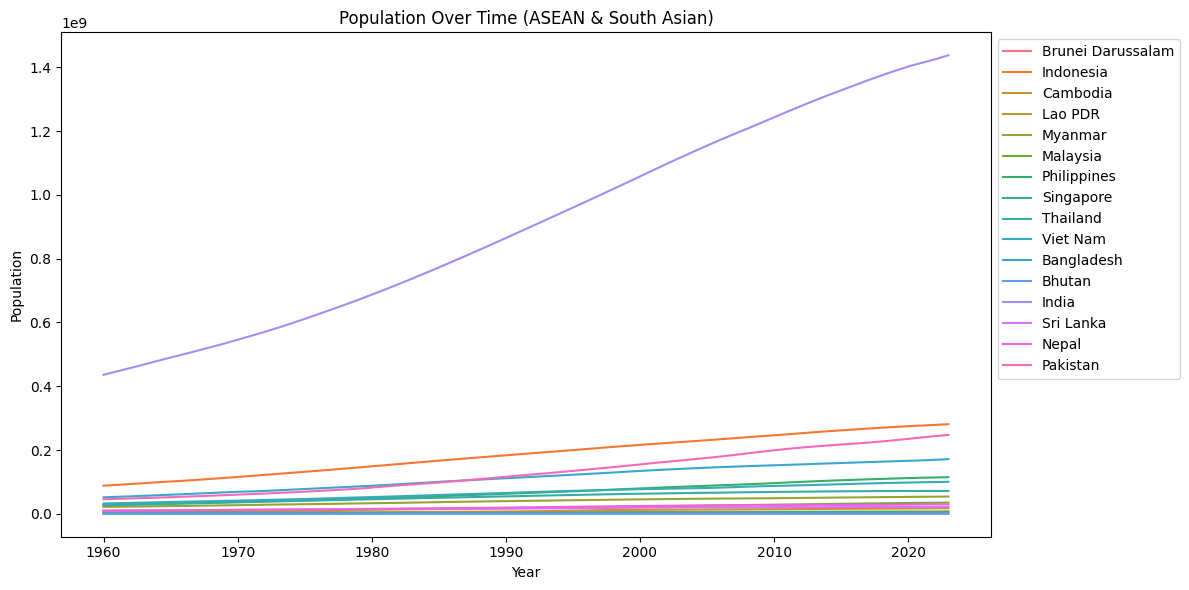

In [86]:
# Time series plot for total population
import seaborn as sns
import matplotlib.pyplot as plt

# Filter for a single indicator
df_plot = df[df['indicator'] == 'Population, total']

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_plot, x='date', y='value', hue='country')
plt.title('Population Over Time (ASEAN & South Asian)')
plt.ylabel('Population')
plt.xlabel('Year')
plt.legend(loc='best', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()


In [8]:
import pandas as pd

# Load your dataset
df = pd.read_csv('../data/processed/index_merged_asean_sa_data.csv')


# Count unique countries with non-missing values for each indicator
country_counts = df.dropna(subset=['value']).groupby('indicator')['country'].nunique().reset_index()
country_counts.columns = ['indicator', 'num_countries']

# Display the result
print(country_counts)


                                           indicator  num_countries
0           Fertility rate, total (births per woman)             16
1  GDP per capita, PPP (constant 2021 internation...             16
2            Life expectancy at birth, total (years)             16
3     Mortality rate, infant (per 1,000 live births)             16
4  Population density (people per sq. km of land ...             16
5                       Population growth (annual %)             16
6                                  Population, total             16
7  Poverty headcount ratio at national poverty li...             14
8           Rural population (% of total population)             16
9           Urban population (% of total population)             16


In [3]:
df.groupby('indicator')['value'].apply(lambda x: x.isna().sum()).reset_index(name='missing_count')


,indicator,missing_count
0,"Fertility rate, total (births per woman)",16
1,"GDP per capita, PPP (constant 2021 internation...",497
2,"Life expectancy at birth, total (years)",16
3,"Mortality rate, infant (per 1,000 live births)",70
4,Population density (people per sq. km of land ...,48
5,Population growth (annual %),32
6,"Population, total",16
7,Poverty headcount ratio at national poverty li...,951
8,Rural population (% of total population),16
9,Urban population (% of total population),16
